## Introduction to Python, Numpy and Scipy

**1) From a word containing all the alphabet letters, generate with a string slicing the string cfilorux.
Do the same for the string vxz.**

In [ ]:
import string
string1 = string.ascii_lowercase[:26]
string2 = string.ascii_lowercase[2:26:3]
string3 = string.ascii_lowercase[21:26:2]
print (f'This is one option to get from {string1} to {string2} and {string3}') 

**2) Display the number π with 9 digits.**

In [ ]:
import numpy as np
pi = np.pi
rounded = round(pi,9)
print (f'The number π with 9 digits is {rounded}') 

3) Count the number of occurrences of each character in the string s="HelLo WorLd!!". Output a
dictionary that for each character associate the number of occurrences.

In [ ]:
s = "HelLo WorLd!!"
d = {i : s.count(i) for i in set(s)}
print (f'The count of all characters in {s} is :\n' + str(d)) 
# Améliorations: créer une fonction et tester string

4) Write a function performing the Cesar code : each character is replaced by the third next one (i.e.
a by d, b by e, z by c). Test it.

In [ ]:
#A python program to illustrate Caesar Cipher Technique 
def encrypt(text,s): 
    result = "" 
  
    # traverse text 
    for i in range(len(text)): 
        char = text[i] 
  
        # Encrypt uppercase characters 
        if (char.isupper()): 
            result += chr((ord(char) + s-65) % 26 + 65) 
  
        # Encrypt lowercase characters 
        else: 
            result += chr((ord(char) + s - 97) % 26 + 97) 
  
    return result 
  
#check the above function 
text = "Louis!"
s = 3
print("Text  : " + text)
print("Shift : " + str(s))
print("Cipher: " + encrypt(text,s))
#Pourquoi est-ce qu'il faut disjoindre cas uppercase/lowercase?

5) Compute this product (one can approximate 8 by a large number n). Use for instance time to
determine a fast version. Propose a version without loop, using Numpy

In [ ]:
import time
start = time.time()
x = np.arange(1,100000)
f = 2*(4*x**2)/(4*x**2-1)
res = np.prod(f)
end = time.time()
time = round(end-start,5)
print(f"The product result is {res}. It took {time} sec to compute")



6) Without using for / while loops, create a random matrix M P R
5ˆ6 with coefficients taken
uniformly (and independently) in r´1, 1s. Substract to each even column of M, twice the value of
the following (uneven) column Replace the negative values by 0 using a binary mask.

In [ ]:
from copy import copy

# Creating a random matrix in Mp,r(5,6) with coefficients taken uniformly
# (and independently) in [-1, 1]
M = np.random.uniform(low=-1, high=1, size=(5,6))

# Substract to each even column of M, twice the value of
# the following (uneven) column 
N = copy(M) # avoiding reference
N[:, 1::2]=[[00000]]
N = np.roll(N, -1, axis=1)
N = 2*N
M = M-N

# Replace the negative values by 0 using a binary mask
M = np.where(M < 0, 0, M)

print (f'The final matrix is :\n' + str(M))



7) Create a random matrix M P 5 ˆ 20 with coefficients taken uniformly (and independently) in
r´1, 1s. Test whether G “ MJM is symmetric (semi-) definite positive, and that its eigenvalues are
positive. What is the rank of G ? Compute the Euclidean norm of G. Compute the `1 norm of the
columns of G.

In [ ]:
M = np.random.uniform(low=-1, high=1, size=(5,20))
MT = M.T
G = np.dot(MT, M)

def is_sym_pos_sem_def(x):
    if np.allclose(G, G.T) == True:
        if np.all(np.linalg.eigvals(x) > 0):
                  return "The matrix is symmetric positive definite"
        elif np.all(np.linalg.eigvals(x) >= 0):
                  return "The matrix symmetric positive semi-definite"
        else:
            return "The matrix is symmetric but not positive semi-definite or definite"
    else:
        return "The matrix is not symmetric"
    
print(is_sym_pos_sem_def(G))

from numpy.linalg import matrix_rank
rank = matrix_rank(G) 
print (f'The rank of G is {norm}')

from numpy import linalg as LA
norm = LA.norm(G)
print (f'The Euclidian norm of G is {norm}')

for i in range(0, np.shape(G)[1]):
    c = G[:,i] 
    l1 = LA.norm(c, ord=1)  
    print(f'The L1 norm of column {i+1} is {round(l1, 2)}')

8) Use a list comprehension to construct a list with all squares from 1 to 121. Do the same using only
numpy.

In [ ]:
squares = [i**2 for i in range(1, 12)] # compute it as math.sqrt(121)+1?
squares_np = np.square(range(1,12))
squares == squares_np

## Introduction to Pandas, Matplotlib, etc.

**Let us use the dataset Individual household electric power consumption Data Set.**

9) First, execute the following commands to download the data (this snippet is also in
download_hpc.py on the Moodle if copy pasting fails) :

In [32]:
from os import path
import pandas as pd
pd.options.mode.chained_assignment = None
import urllib
import zipfile
import sys
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename
if not(path.isfile('zipfilename')):
    urllib.request.urlretrieve(Location, zipfilename)
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)

In [33]:
df.shape

(200000, 3)

In [34]:
df.columns

Index(['Date', 'Time', 'Global_active_power'], dtype='object')

In [35]:
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


We only focus on the Global_active_power feature for the moment.

10) Detect and count the number of line with missing values

In [36]:
df.dtypes

Date                    object
Time                    object
Global_active_power    float64
dtype: object

In [37]:
df.isna()

# we have to be aware of the limitations of .isna which only surfaces NaN or None values. 
# in a real setting we would devise strategies to identify other types of missing values.

,Date,Time,Global_active_power
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
199995,False,False,False
199996,False,False,False
199997,False,False,False
199998,False,False,False


In [38]:
df[df.isna().any(axis=1)] # any returns the row if at least one value in the row is true

,Date,Time,Global_active_power
6839,21/12/2006,11:23:00,NaN
6840,21/12/2006,11:24:00,NaN
19724,30/12/2006,10:08:00,NaN
19725,30/12/2006,10:09:00,NaN
41832,14/1/2007,18:36:00,NaN
...,...,...,...
194215,30/4/2007,14:19:00,NaN
194216,30/4/2007,14:20:00,NaN
194217,30/4/2007,14:21:00,NaN
194218,30/4/2007,14:22:00,NaN


In [39]:
df.isna().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

11) Erase all such lines.

In [40]:
df = df.dropna() # drop rows with at least one NaN value 

In [41]:
df.shape

(196268, 3)

In [42]:
df.isna().sum()

Date                   0
Time                   0
Global_active_power    0
dtype: int64

12) Use to_datetime and set_index to create a Time Series (beware of the international dates format
that is different from the French standard).

In [43]:
# Concatenate Date and Time columns into a new Datetime column
df['Datetime'] = df['Date'] + ' ' + df['Time']

# Convert Datetime to datetime format
df['Datetime'] =  pd.to_datetime(df['Datetime'], dayfirst=True)
# print(df.dtypes) Datetime is of datetime64[ns] type

# Set the converted column to index
df = df.set_index('Datetime')
df = df.drop(df.columns[[0, 1]], axis=1)
print(df.head())
print(df.shape)

                     Global_active_power
Datetime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666
(196268, 1)


13) Display the graphic of daily averages, between January 1 2007 and April 30 2007. Propose an
explanation for the consumption behavior between February and early April. On top of matplotlib
you could use the seaborn package for nicer display

                     Global_active_power
Datetime                                
2007-01-01 00:00:00                2.580
2007-01-01 00:01:00                2.552
2007-01-01 00:02:00                2.550
2007-01-01 00:03:00                2.550
2007-01-01 00:04:00                2.554
...                                  ...
2007-04-30 23:55:00                0.362
2007-04-30 23:56:00                0.362
2007-04-30 23:57:00                0.362
2007-04-30 23:58:00                0.358
2007-04-30 23:59:00                0.356

[169072 rows x 1 columns]
(169072, 1)
            Global_active_power
Datetime                       
2007-01-01             1.909031
2007-01-02             0.881414
2007-01-03             0.704204
2007-01-04             2.263481
2007-01-05             1.884281
...                         ...
2007-04-26             0.885740
2007-04-27             0.759953
2007-04-28             1.082762
2007-04-29                  NaN
2007-04-30             0.730594

[120 rows x

Text(0, 0.5, 'Household global active power (in kilowatt)')

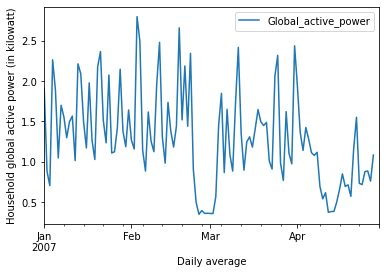

In [44]:
# Create a new dataframe between January 1 2007 and April 30 2007
df2 = df.loc['2007-01-01':'2007-04-30']  
print(df2)
print(df2.shape) # we only lose 15 days

# Get daily averages
df3 = df2.resample('D').mean()
print(df3) # We get NaNs! How come!
print(df3.shape) # We get 120 rows, i.e. 4x30 days

# Display it using matplotlib 
import matplotlib.pyplot as plt
df3.plot()
plt.xlabel("Daily average")
plt.ylabel("Household global active power (in kilowatt)")

# Display it using Seaborn
# Interpretation Feb/April

# fluctuating around average 1.5, mostly between 1 and 2 
# we get 4 peaks per months, probably on weekends (further analysis required: time series decomposition) (cyclycity)
# we have 2 outliers below average: end of feb, end of april
# Feb 23th - March 3rd: supply outage? A min was reached Feb 25th


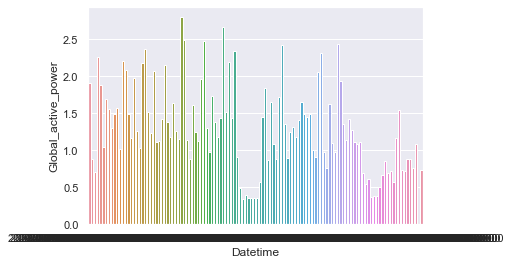

In [45]:
import seaborn as sns
sns.set()
sns.barplot(x=df3.index, y="Global_active_power", data=df3)
# x-axis not showing up

In [46]:
df3.isna().sum()

Global_active_power    1
dtype: int64

In [ ]:
df3[df3.isna().any(axis=1)] # any returns the row if at least one value in the row is true

In [ ]:
df4 = df2.loc['2007-04-29']  
df4
# it seems that we have no data for Apr 29th

In [ ]:
df3.loc['2007-02-15':'2007-03-5'] 

In [ ]:
df5 = df2.loc['2007-02-28'] 
df5.plot()
# usual pattern
# 0.2 and 0.4 seems to be the floor consumption (batteries charging etc)
# peak when people wake up and in the evening
# except on saturday nights where there is more activity at night

# Feb 23th - March 3rd: 
# average is much lower (between 0.2 and 04)
# there are regular peaks throughout the 
# day (every 10 hour)

## Let us now add some temperature information for our study. Such information can be found on Moodle in “TG_STAID011249.txt”. Here the temperatures available are the one in Orly (note that the place were the consumption was collected is unknown in the previous dataset).

**14) Load the dataset with pandas, and keep only the DATE and TG columns. Divide by 10 the TG column
to get Celsius temperature. Treat missing values as NaNs.**

In [12]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
orly = pd.read_csv('TG_STAID011249.txt', sep=",")
orly 

# df = pd.read_csv('some_data.csv', usecols = ['DATE','TG']) throws an error

,STAID,SOUID,DATE,TG,Q_TG
0,11249,71642,19210301,50,0
1,11249,71642,19210302,46,0
2,11249,71642,19210303,46,0
3,11249,71642,19210304,31,0
4,11249,71642,19210305,95,0
...,...,...,...,...,...
34878,11249,907149,20160827,266,0
34879,11249,907149,20160828,255,0
34880,11249,907149,20160829,206,0
34881,11249,907149,20160830,204,0


In [13]:
orly.columns
# We got an error because the colnames have whitespace

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [14]:
old_cols = list(orly.columns)
new_cols = [i.strip() for i in old_cols] 
new_cols

['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG']

In [15]:
orly.columns = new_cols
orly.columns

Index(['STAID', 'SOUID', 'DATE', 'TG', 'Q_TG'], dtype='object')

In [16]:
orly = orly[['DATE','TG']]
orly

,DATE,TG
0,19210301,50
1,19210302,46
2,19210303,46
3,19210304,31
4,19210305,95
...,...,...
34878,20160827,266
34879,20160828,255
34880,20160829,206
34881,20160830,204


In [17]:
orly['TG'] = orly['TG'].div(10)
orly

,DATE,TG
0,19210301,5.0
1,19210302,4.6
2,19210303,4.6
3,19210304,3.1
4,19210305,9.5
...,...,...
34878,20160827,26.6
34879,20160828,25.5
34880,20160829,20.6
34881,20160830,20.4


In [18]:
orly.isna().sum()

DATE    0
TG      0
dtype: int64

In [19]:
orly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    34883 non-null  int64  
 1   TG      34883 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 545.2 KB


In [20]:
orly.describe()

,DATE,TG
count,3.488300e+04,34883.000000
mean,1.968482e+07,-231.823358
std,2.757153e+05,432.177821
min,1.921030e+07,-999.900000
25%,1.945011e+07,-2.800000
50%,1.968113e+07,8.200000
75%,1.992102e+07,15.000000
max,2.016083e+07,31.600000


In [21]:
orly.TG.mode()

0   -999.9
dtype: float64

In [22]:
#idxmin
# connaitre dates pr lesquelles -999

In [23]:
orly.loc[orly['TG'] < -999] = np.nan
# replace cells equale to -999.9 by np.nan

In [25]:
orly.isna().sum()

DATE    8387
TG      8387
dtype: int64

**15) Create a pandas Time Series with the daily temperatures between January 1 2007 and April 3 2007. Display on the same graph the temperature and the Global_active_power Time Series.**

In [26]:
orly['DATE'] = pd.to_datetime(orly['DATE'], format='%Y%m%d')
orly = orly.set_index('DATE')
orly

,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
...,...
2016-08-27,26.6
2016-08-28,25.5
2016-08-29,20.6


Text(0, 0.5, 'Temperature (°C)')

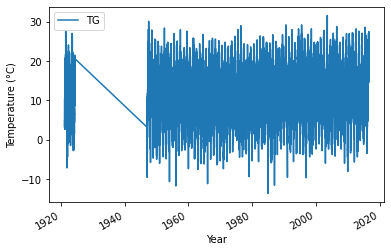

In [28]:
import matplotlib.pyplot as plt
orly.plot()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

Text(0, 0.5, 'Temperature (°C)')

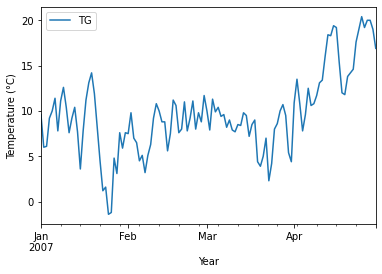

In [31]:
orly2 = orly.loc['2007-01-01':'2007-04-30'] 
orly2.plot()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

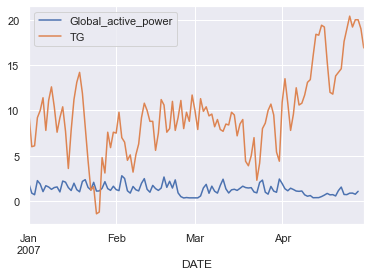

In [53]:
ax = df3.plot()
orly2.plot(ax=ax)
# A améliorer: créer 2ème axe y

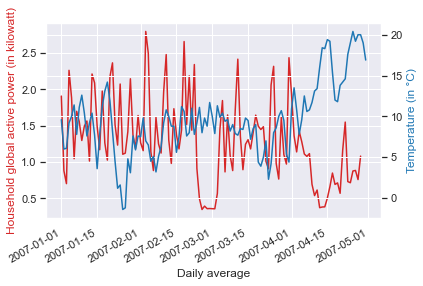

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = orly2.index
data1 = df3['Global_active_power']
data2 = orly2['TG']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Daily average')
ax1.set_ylabel('Household global active power (in kilowatt)', color=color)
ax1.plot(t, data1, color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature (in °C)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)

fig.autofmt_xdate()

plt.show()



In [84]:
# Change here using YOUR first and last names
fn1 = "Mathis"
ln1 = "Batoul"
fn2 = "Louis"
ln2 = "Fialho"
filename = "_".join(map(lambda s: s.strip().lower(),
["lab_1_intro", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

lab_1_intro_batoul_mathis_and_fialho_louis.ipynb
